# Data analysis - paired data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = '../../../datasets/progenitor-pair/128 snpshots/training_data.csv'
os.path.exists(filename)

True

In [3]:
df = pd.read_csv(filename)
df.head()

,hostHalo,numSubStruct,Mvir,npart,Xc,Yc,Zc,VXc,VYc,VZc,...,progenitor_Phi0,progenitor_cNFW,progenitor_ID,progenitor_numProgenitors,progenitor_ProgenitorsID,progenitor_redshift,progenitor_snapshot,rel_location,rel_velocity,Is_Progenitor
0,0,1,1.194320e+12,2388,491500.296659,518076.353644,488717.205503,129.63,-627.76,970.22,...,302568.0,3.06591,88000000000318,1,[87000000000360],1.425,88,3396.093394,230.490771,0
1,0,0,2.536440e+11,41,504146.830241,471645.736694,510191.893578,118.86,297.52,-298.17,...,9261.8,13.45310,109000000019986,1,[108000000020513],0.523,109,4658.358144,331.913253,0
2,0,0,4.763950e+10,53,502569.429080,497138.503194,502457.616727,-1225.27,615.67,-84.02,...,196636.0,7.88160,106000000000620,1,[105000000000668],0.628,106,3408.032744,1371.386905,0
3,0,0,6.847900e+10,80,511772.554295,504550.229101,501548.588276,-1274.80,-162.87,-97.98,...,137324.0,17.13470,93000000001535,1,[92000000001495],1.170,93,4780.720871,669.333124,0
4,0,0,5.191940e+10,58,495223.954320,486824.937993,489803.996351,395.66,28.44,604.51,...,16714.9,8.32033,126000000008659,1,[125000000007894],0.045,126,162.209651,8.278315,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913872 entries, 0 to 913871
Data columns (total 97 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hostHalo                   913872 non-null  int64  
 1   numSubStruct               913872 non-null  int64  
 2   Mvir                       913872 non-null  float64
 3   npart                      913872 non-null  int64  
 4   Xc                         913872 non-null  float64
 5   Yc                         913872 non-null  float64
 6   Zc                         913872 non-null  float64
 7   VXc                        913872 non-null  float64
 8   VYc                        913872 non-null  float64
 9   VZc                        913872 non-null  float64
 10  Rvir                       913872 non-null  float64
 11  Rmax                       913872 non-null  float64
 12  r2                         913872 non-null  float64
 13  mbp_offset                 91

In [5]:
y = df.Is_Progenitor
X = df.drop(columns=['hostHalo','ProgenitorsID','progenitor_ProgenitorsID','progenitor_snapshot', ])

In [6]:
col = X.columns
print(col)

Index(['numSubStruct', 'Mvir', 'npart', 'Xc', 'Yc', 'Zc', 'VXc', 'VYc', 'VZc',
       'Rvir', 'Rmax', 'r2', 'mbp_offset', 'com_offset', 'Vmax', 'v_esc',
       'sigV', 'lambda', 'lambdaE', 'Lx', 'Ly', 'Lz', 'b', 'c', 'Eax', 'Eay',
       'Eaz', 'Ebx', 'Eby', 'Ebz', 'Ecx', 'Ecy', 'Ecz', 'ovdens', 'nbins',
       'fMhires', 'Ekin', 'Epot', 'SurfP', 'Phi0', 'cNFW', 'ID',
       'numProgenitors', 'redshift', 'snapshot', 'progenitor_hostHalo',
       'progenitor_numSubStruct', 'progenitor_Mvir', 'progenitor_npart',
       'progenitor_Xc', 'progenitor_Yc', 'progenitor_Zc', 'progenitor_VXc',
       'progenitor_VYc', 'progenitor_VZc', 'progenitor_Rvir',
       'progenitor_Rmax', 'progenitor_r2', 'progenitor_mbp_offset',
       'progenitor_com_offset', 'progenitor_Vmax', 'progenitor_v_esc',
       'progenitor_sigV', 'progenitor_lambda', 'progenitor_lambdaE',
       'progenitor_Lx', 'progenitor_Ly', 'progenitor_Lz', 'progenitor_b',
       'progenitor_c', 'progenitor_Eax', 'progenitor_Eay', 'prog

In [7]:
selected_features = df[['numSubStruct', 'Mvir', 'npart','Rvir', 'Rmax', 'r2', 'mbp_offset', 'com_offset', 'Vmax', 'v_esc',
       'sigV', 'lambda', 'lambdaE','ovdens', 'nbins','fMhires', 'Ekin', 'Epot', 'SurfP', 'Phi0', 'cNFW','numProgenitors', 'redshift','snapshot','Is_Progenitor']] 

In [8]:
selected_features.head()

,numSubStruct,Mvir,npart,Rvir,Rmax,r2,mbp_offset,com_offset,Vmax,v_esc,...,fMhires,Ekin,Epot,SurfP,Phi0,cNFW,numProgenitors,redshift,snapshot,Is_Progenitor
0,1,1.194320e+12,2388,242.91,37.75,99.45983,1.67882,4.94992,268.18,318.225140,...,1.000000,4.056700e+16,-7.298540e+16,-1.312440e+16,370876.0,9.73877,1,1.372,89,0
1,0,2.536440e+11,41,128.18,62.18,47.27367,18.21858,13.42441,130.56,159.235496,...,0.095333,1.477000e+15,-3.090170e+15,-6.241920e+14,37778.5,8.36436,1,0.490,110,0
2,0,4.763950e+10,53,84.30,12.04,8.79766,5.40152,7.02959,88.53,87.974927,...,1.000000,1.189190e+14,-2.674710e+14,-1.306810e+13,20507.8,19.32760,1,0.592,107,0
3,0,6.847900e+10,80,94.58,22.70,17.97184,5.49511,6.32830,115.82,119.675403,...,1.000000,2.635740e+14,-7.139550e+14,-4.856050e+13,36176.3,19.39700,1,1.123,94,0
4,0,5.191940e+10,58,62.12,3.18,28.98581,1.68667,23.96082,87.53,85.711638,...,1.000000,1.049780e+14,-1.946300e+14,-5.581400e+13,22097.4,20.36100,1,0.022,127,1


<AxesSubplot:xlabel='redshift', ylabel='cNFW'>

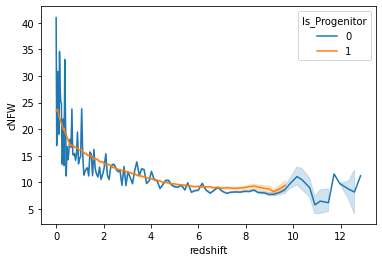

In [9]:

sns.lineplot(data=selected_features, x='redshift',y='cNFW',hue='Is_Progenitor')

This shows the random sample relating to cNFW is fair.

<AxesSubplot:xlabel='redshift', ylabel='Rvir'>

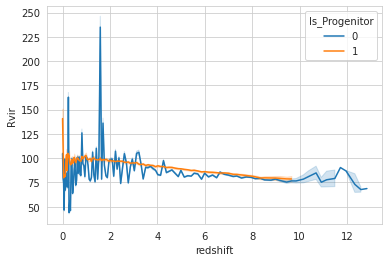

In [10]:
sns.set_style("whitegrid")
sns.lineplot(data=selected_features, x='redshift',y='Rvir',hue='Is_Progenitor')

<AxesSubplot:xlabel='redshift', ylabel='r2'>

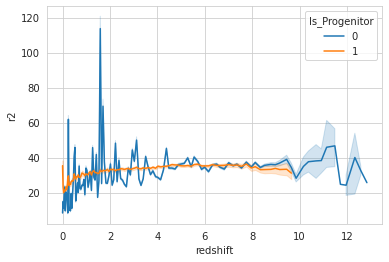

In [11]:
sns.lineplot(data=selected_features, x='redshift',y='r2',hue='Is_Progenitor')

<AxesSubplot:>

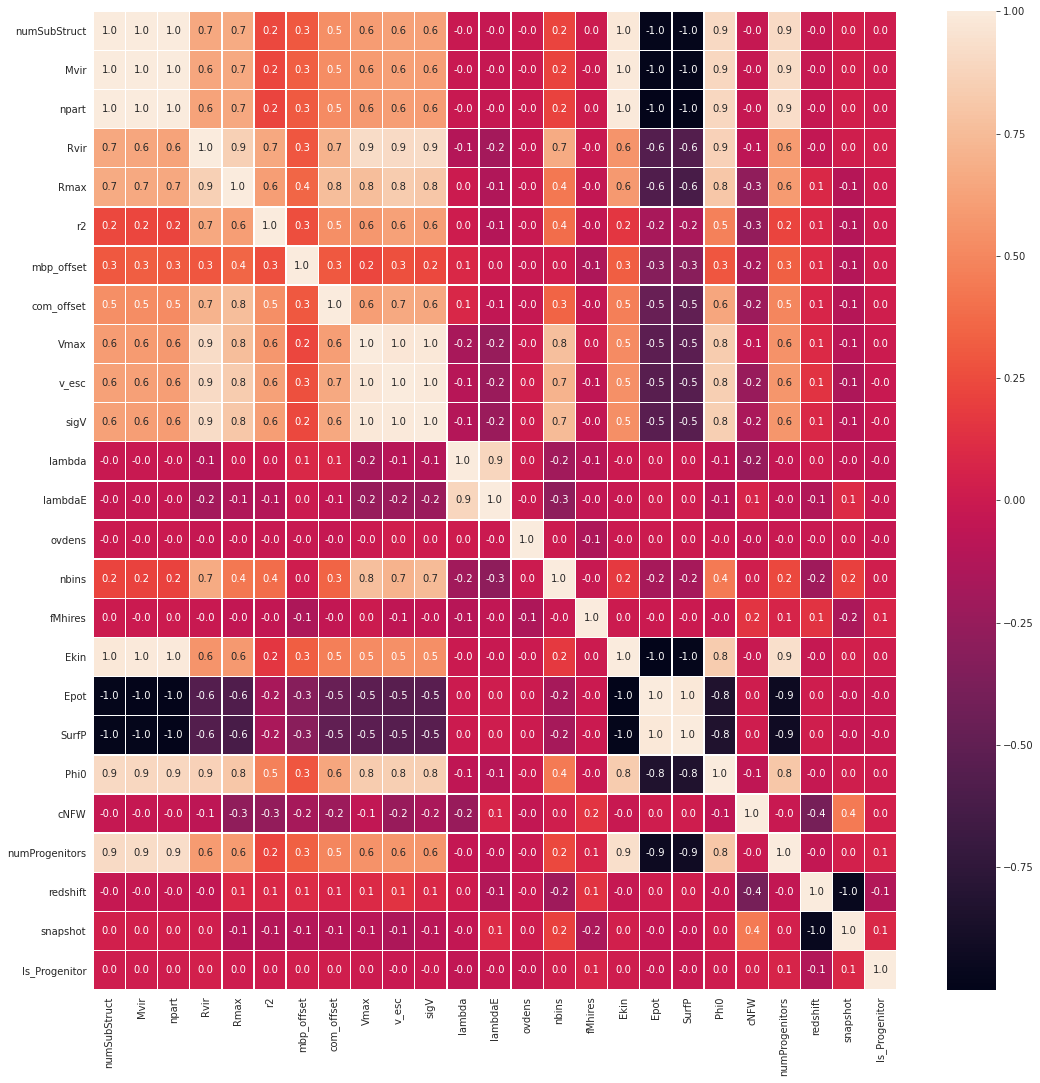

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(selected_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

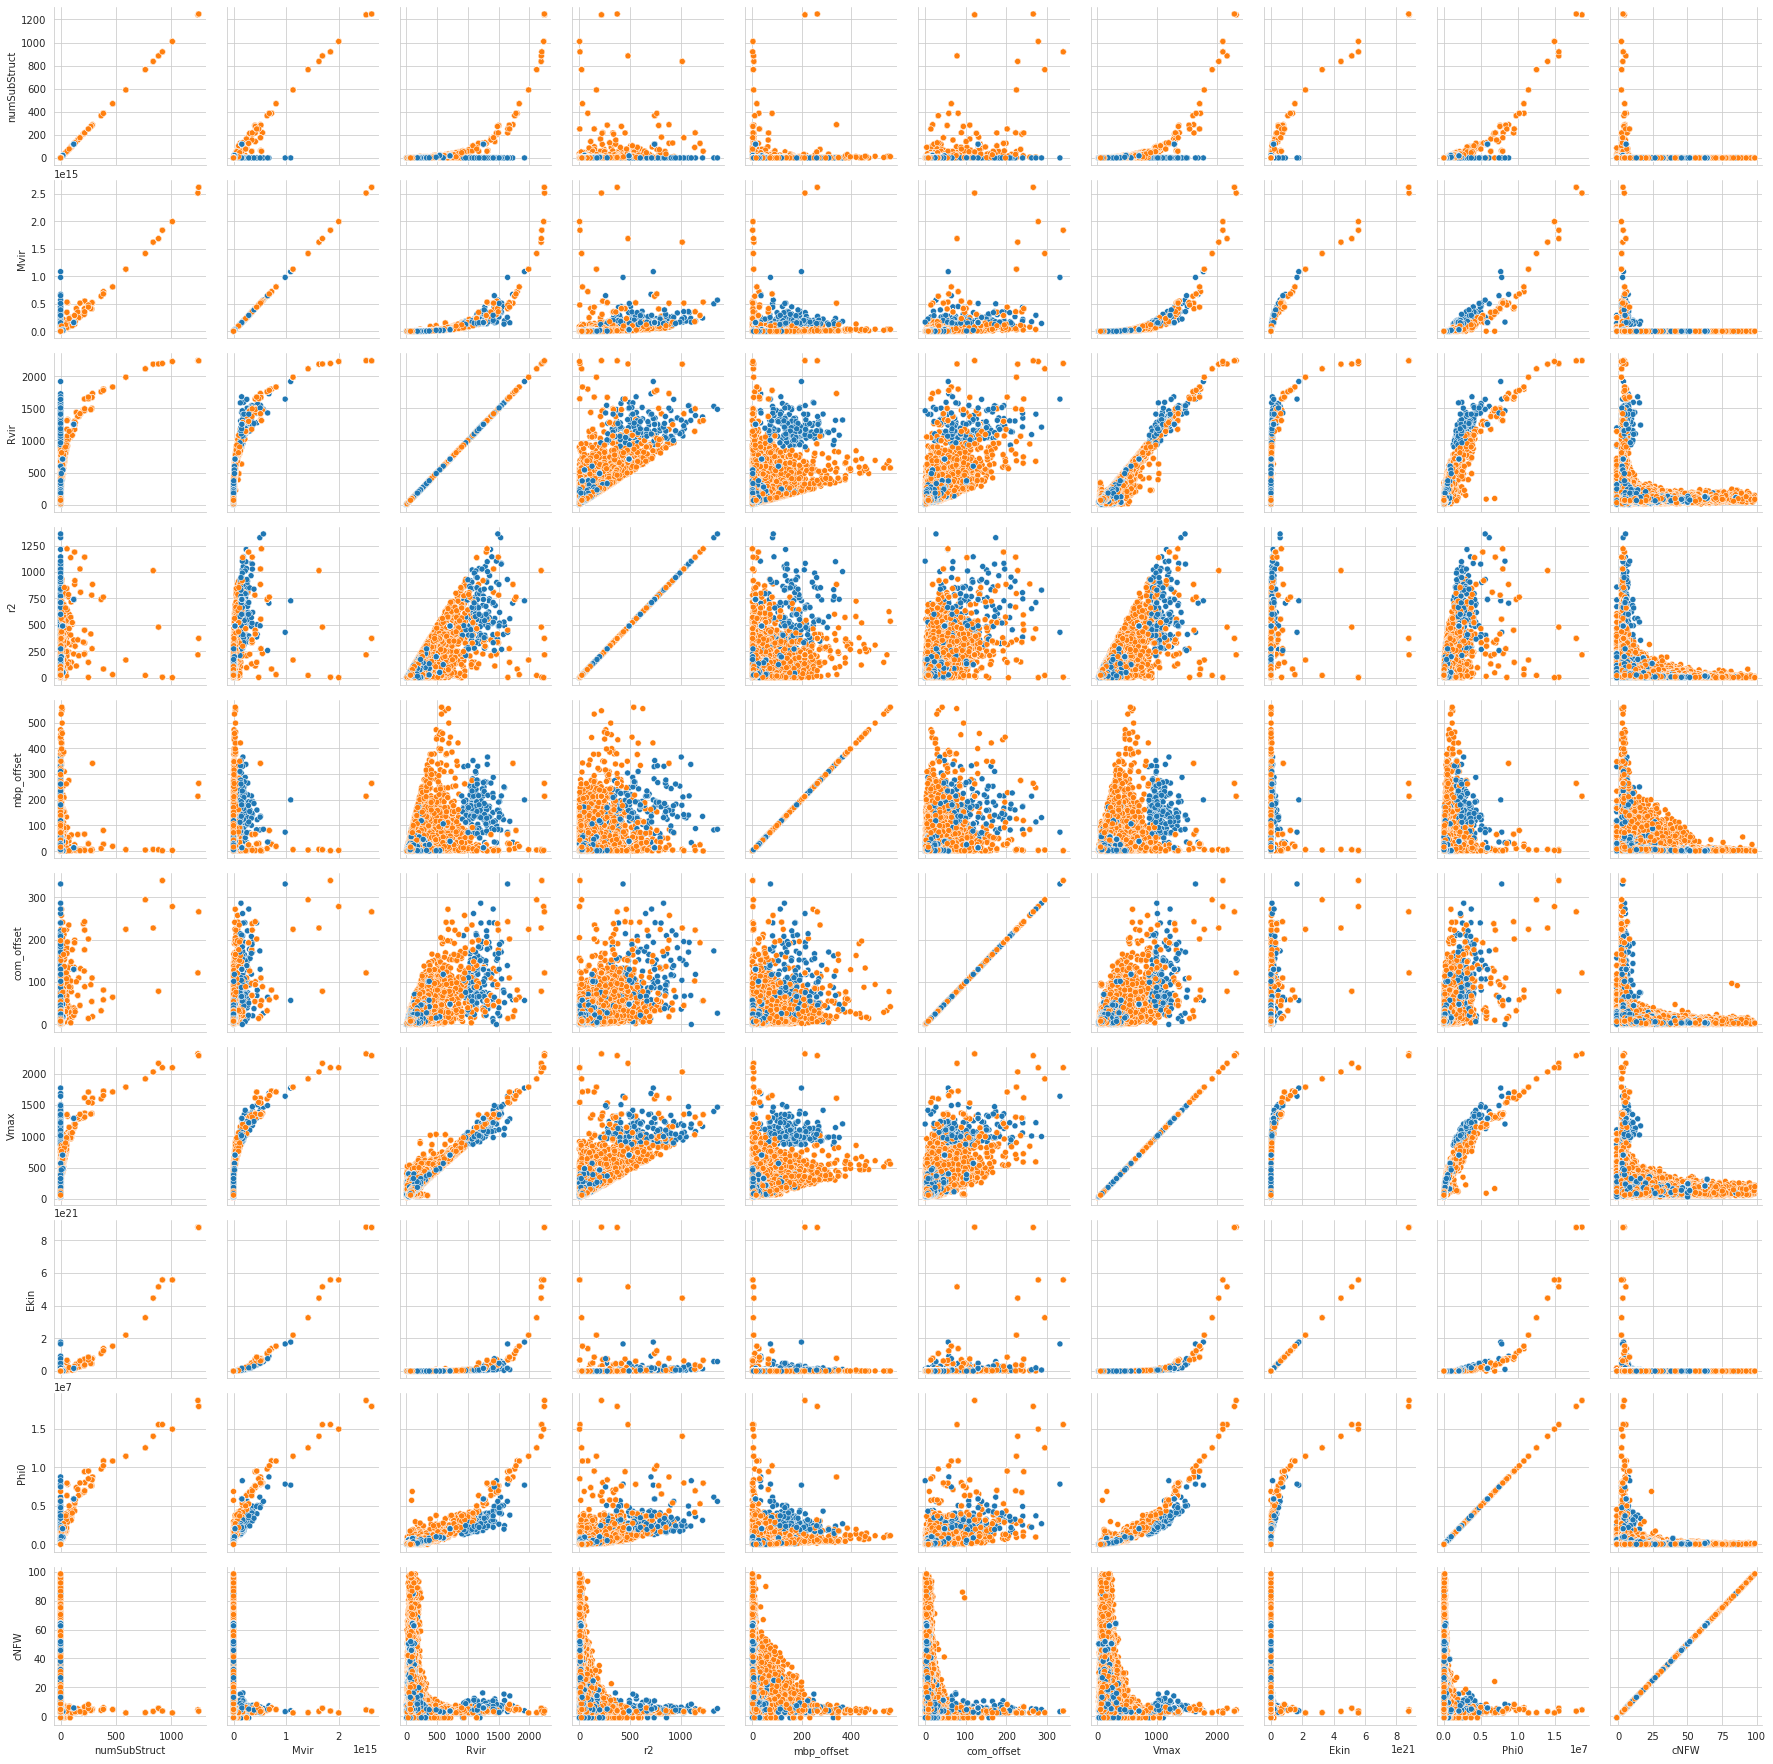

In [13]:
g = sns.PairGrid(selected_features, vars=['numSubStruct', 'Mvir','Rvir', 'r2', 'mbp_offset', 'com_offset','Vmax','Ekin','Phi0','cNFW'],hue='Is_Progenitor')
g.map(sns.scatterplot)

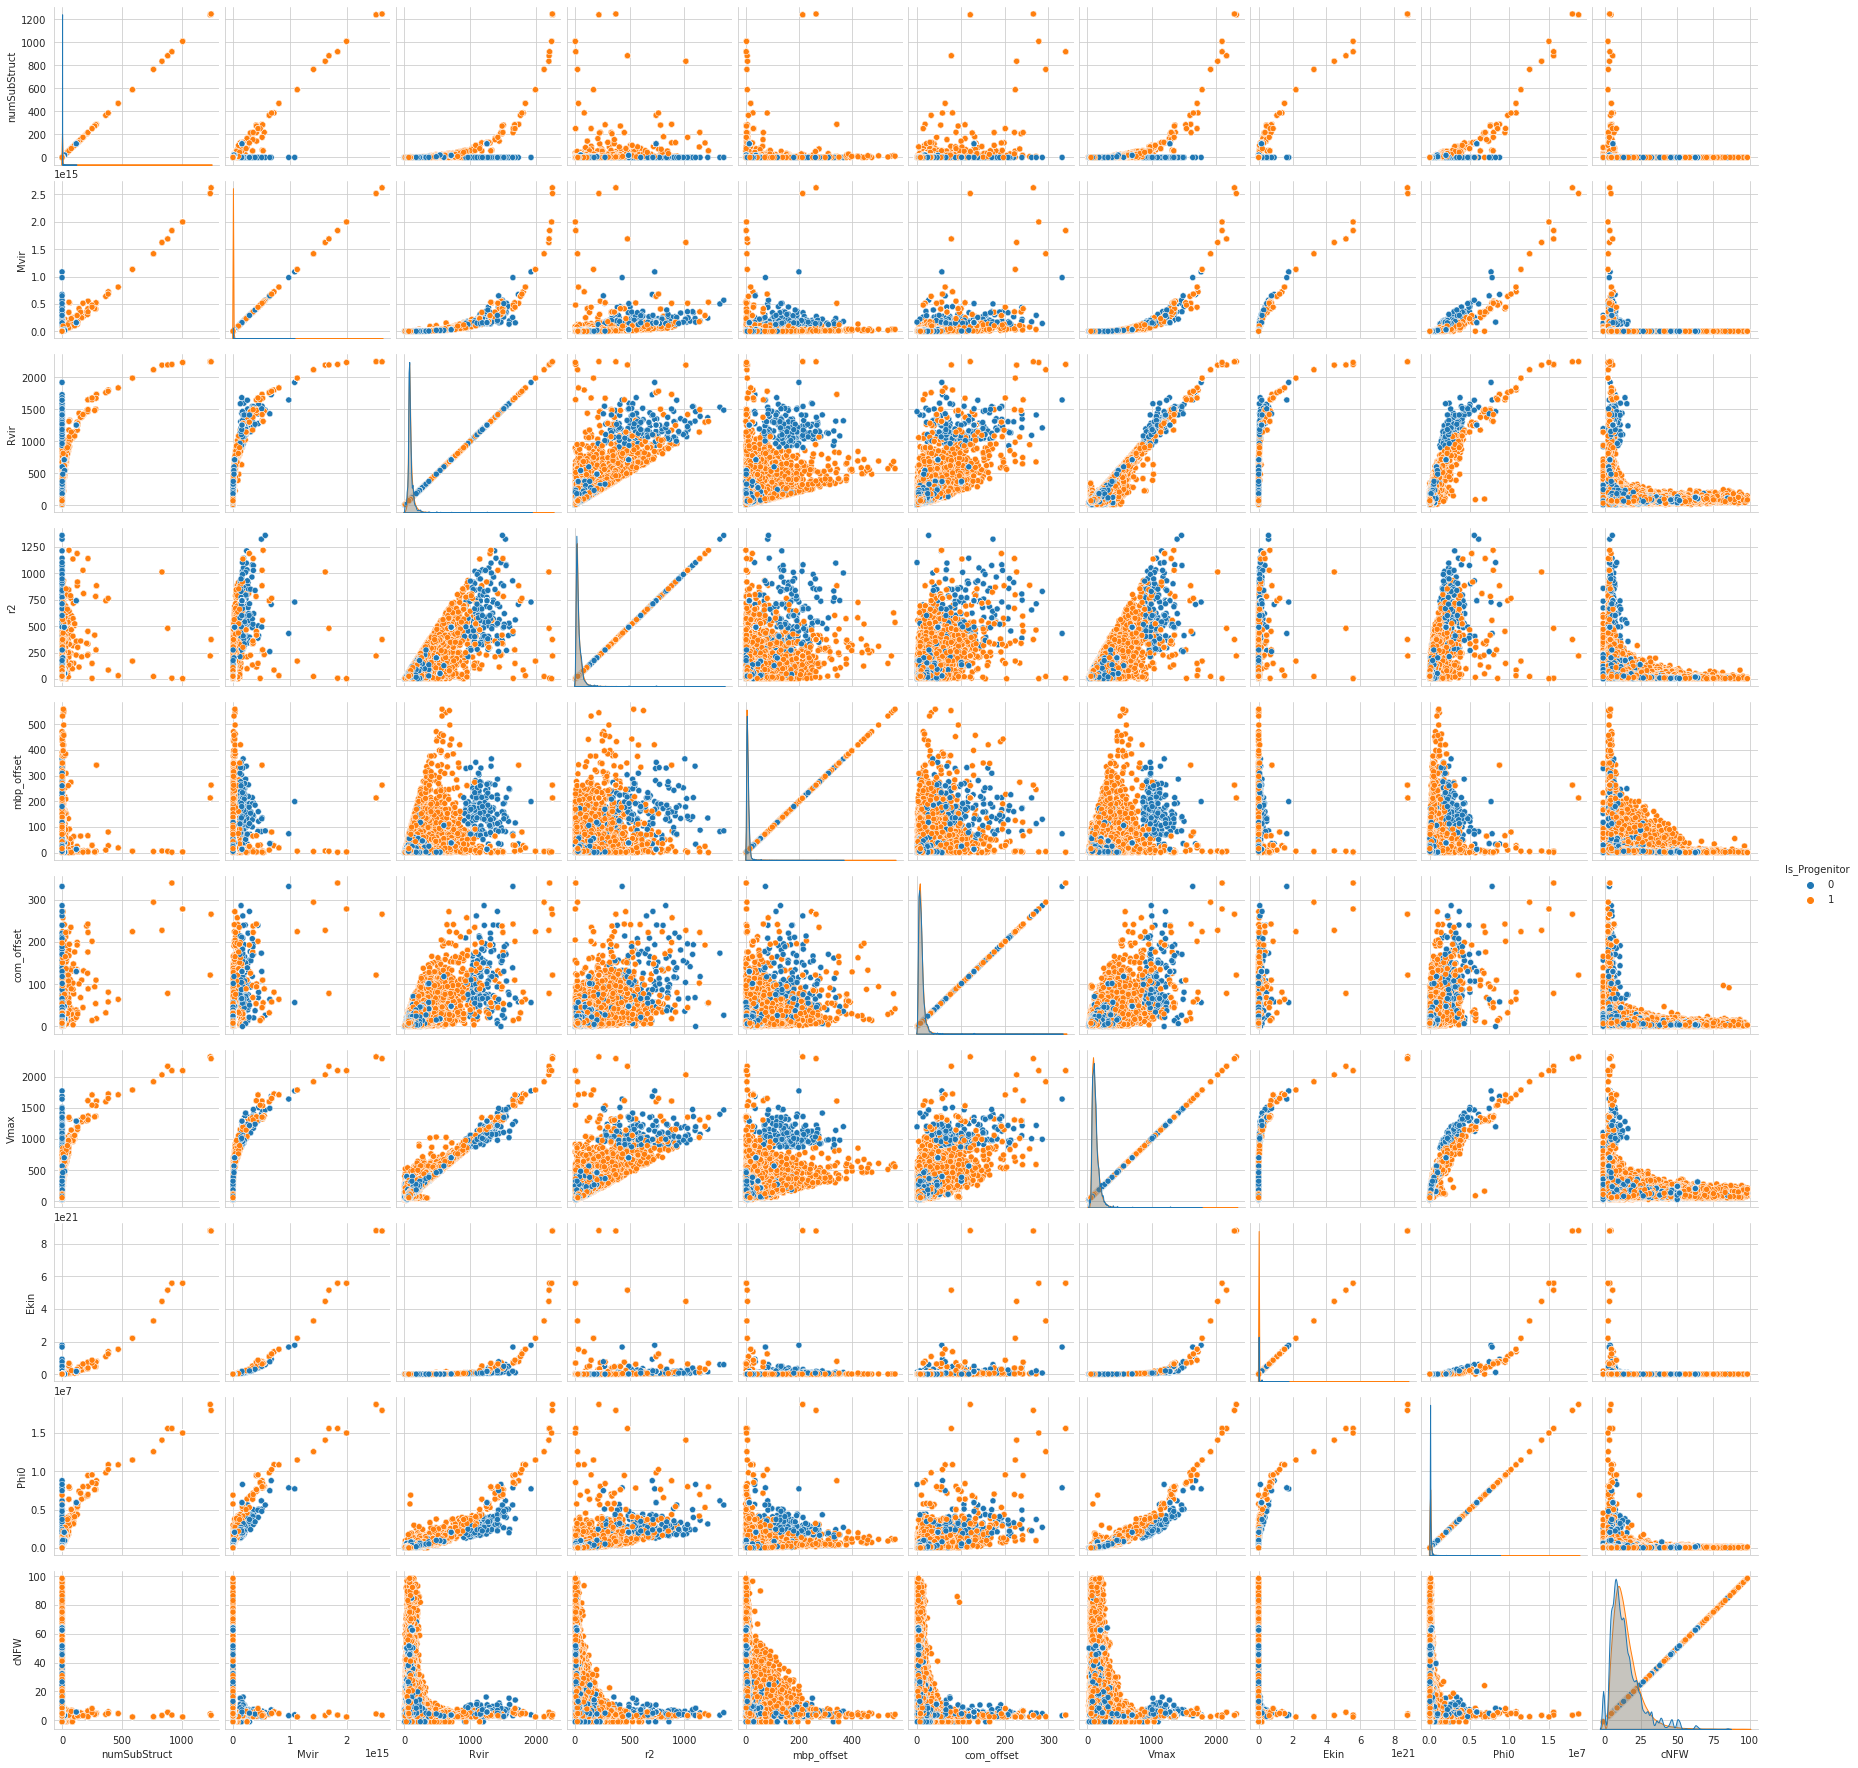

In [15]:
g = sns.pairplot(selected_features, vars=['numSubStruct', 'Mvir','Rvir', 'r2', 'mbp_offset', 'com_offset','Vmax','Ekin','Phi0','cNFW'],hue='Is_Progenitor')
g.map(sns.scatterplot)

In [ ]:
df_corr = X.corr()['Is_Progenitor'][:-1]
golden_features_list = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongy correlated values with Is_progenitor:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
df_corr = X.corr()['Is_Progenitor'][:-1]
features_list = df_corr[abs(df_corr) > 0.1].sort_values(ascending=False)
print("There is {} slightly correlated values with Is_progenitor:\n{}".format(len(features_list), features_list))

In [ ]:
df['redshift'].describe()

In [ ]:
# Is_progenitor vs redshift
sns.lineplot(data=df, x= 'redshift', y= 'Is_Progenitor')

In [ ]:
sns